In [2]:
import numpy as np

from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import KFold,cross_val_score,train_test_split
import matplotlib.image as Image
import PIL.Image as Image


In [3]:
m_check = ModelCheckpoint("model/--{epoch:02d}--{val_loss:.4f}.hdf5", monitor = 'val_loss',save_best_only=True)


In [4]:
x = np.load("./drive/MyDrive/train.npy")
print(x[0])

y = np.load("y.npy")


[[[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.36470588 0.36470588 0.36470588]
  [0.2        0.2        0.2       ]
  ...
  [0.2        0.2        0.2       ]
  [0.36470588 0.36470588 0.36470588]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.18431373 0.18431373 0.18431373]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.18431373 0.18431373 0.18431373]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [0.18431373 0.18431373 0.18431373]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.18431373 0.18431373 0.18431373]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.36470588 0.36470588 0.36470588]


In [5]:
def create_model():
    n = 16
    model = Sequential()
    model.add(Conv2D(n*16,(3,3),padding='same',activation='relu',input_shape=(112,150,3)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(n*8,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(n*4,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(n*2,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(n,(2,2),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(n*4,activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(n*2,activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(9,activation="softmax"))

    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['acc'])

    return model


In [6]:
seed = np.random.seed(7)

kf = KFold(n_splits=3, shuffle=True,random_state=seed)


In [7]:

x_train,x_test , y_train,y_test = train_test_split(x,y,shuffle=True , random_state=seed)

In [8]:
model = create_model()
for train_i,test_i in kf.split(x):
    train_x,train_y = x[train_i],y[train_i]
    test_x, test_y = x[test_i], y[test_i]
    history = []
    hist = model.fit(train_x,train_y,batch_size=10,epochs=50,validation_split=0.25,callbacks=[m_check])
    history.append(hist)
    score = model.evaluate(test_x,test_y)
    print(score)

Epoch 1/50
225/225 [==============================] - 10s 43ms/step - loss: 1.9320 - acc: 0.2720 - val_loss: 2.9469 - val_acc: 0.0667
Epoch 2/50
225/225 [==============================] - 9s 42ms/step - loss: 1.3786 - acc: 0.4631 - val_loss: 4.5290 - val_acc: 0.0813
Epoch 3/50
225/225 [==============================] - 9s 42ms/step - loss: 0.7709 - acc: 0.7200 - val_loss: 7.0169 - val_acc: 0.1053
Epoch 4/50
225/225 [==============================] - 9s 42ms/step - loss: 0.5032 - acc: 0.8160 - val_loss: 10.1344 - val_acc: 0.1133
Epoch 5/50
225/225 [==============================] - 9s 42ms/step - loss: 0.3696 - acc: 0.8578 - val_loss: 12.4311 - val_acc: 0.1160
Epoch 6/50
225/225 [==============================] - 9s 42ms/step - loss: 0.2906 - acc: 0.8982 - val_loss: 13.4634 - val_acc: 0.1093
Epoch 7/50
225/225 [==============================] - 9s 42ms/step - loss: 0.2508 - acc: 0.9173 - val_loss: 12.7108 - val_acc: 0.1053
Epoch 8/50
225/225 [==============================] - 9s 42ms/st

In [9]:
predy = model.evaluate(x_test,y_test)
print(predy)

36/36 [==============================] - 1s 22ms/step - loss: 16.1908 - acc: 0.7813
[16.190759658813477, 0.781333327293396]


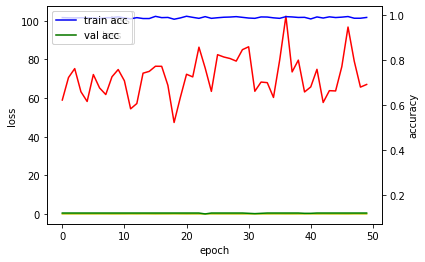

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
hist = history[0]

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

IndexError: ignored

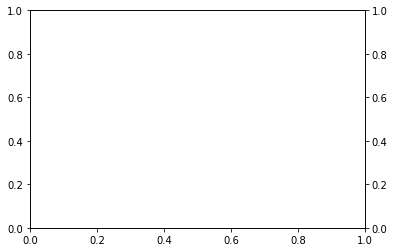

In [11]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
hist = history[1]

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [14]:
history[0]